In [1]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

from PIL import Image, ImageDraw

In [2]:
#Grab image to create mask
file = pd.read_csv("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/"
                "thermal/1618803166_000001_right_336x252_14bit.thermal.celsius.csv")

In [3]:
#Create image list by unpacking data from CSV and placing in correct spot.
image_array = []

for i in range(file.size):
    if i >= 6:
        data = file.values[i][0]
        data = data.split(';')
        array = np.array(data)
        array = array.astype(np.float)
        image_array.append(array)
        

In [5]:
#Create mask list with threshold value.
mask_col = []
count = 0

for j in image_array:
    mask_row = []
    
    for k in range(len(j)):
        
        if k > 160 and k < 200:
        
            if count > 210 and count < 245:
                if j[k] < 2:
                    mask_row.append(1)
                else:
                    mask_row.append(0)

            else:
                 mask_row.append(0)
        else:
             mask_row.append(0)
                
    mask_col.append(mask_row)
    count = count + 1

In [6]:
#create mask array and a find x-y values of for desired area
mask_array = np.array(mask_col)
x, y = np.nonzero(mask_array)

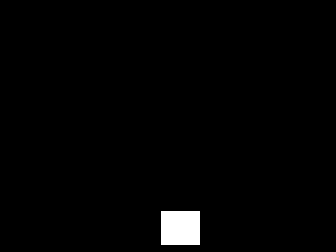

In [7]:
#Create image with with mask array
#This shape is a rectangle given the top left corner and botttom right corner
shape1 = [(10, 150), (70, 190)]

shape2 = [(160, 210), (200, 245)]

#Tranform list into array and convert all true values from 1 to 255 as well as use an unsigned 8-bit integer dtype.
array = np.array(mask_col).astype('uint8')*255

#create image
im = Image.fromarray(array)

#img1 = ImageDraw.Draw(im)
#img1.rectangle(shape2, fill = 150 , outline ="red")
#im.save('Mulch_Mask.png')
im

In [8]:
#Convert mask into a CSV so as to be used else where.
#np.savetxt("Ground_Area2_Mask.csv", mask_array, delimiter = ",")